In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [197]:
df_train = pd.read_csv(r'F:\DS\DataSet\blackfridaysales_archive\train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [198]:
df_test = pd.read_csv(r'F:\DS\DataSet\blackfridaysales_archive\test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [199]:
df_train.shape

(550068, 12)

In [200]:
df_test.shape

(233599, 11)

In [201]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [202]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [203]:
df = pd.concat([df_train,df_test],axis=0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [204]:
#deleting User_ID col as we wont need it
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [205]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:ylabel='None'>

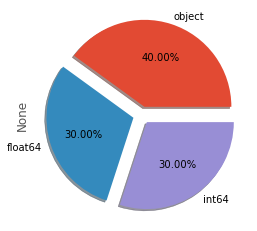

In [206]:
df.dtypes.value_counts().plot.pie(explode = [0.1,0.1,0.1],
                                    autopct = '%1.2f%%', shadow = True)

###### Check for Null values

In [207]:
df.isna().sum().reset_index().rename(columns={'index':'ColumnName',0:'NullCount'})

,ColumnName,NullCount
0,Gender,0
1,Age,0
2,Occupation,0
3,City_Category,0
4,Stay_In_Current_City_Years,0
5,Marital_Status,0
6,Product_Category_1,0
7,Product_Category_2,245982
8,Product_Category_3,545809
9,Purchase,233599


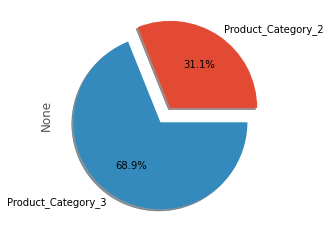

In [208]:
missing_values = df.drop(['Purchase'],axis=1).isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode = [0.1,0.1], autopct = '%1.1f%%', shadow = True);

In [209]:
missing_values

Product_Category_2    245982
Product_Category_3    545809
dtype: int64

###### Inspecting Categorical columns

In [210]:
cols = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
for col in cols:
    catCount = df[col].value_counts(dropna=False).reset_index().rename(columns={'index':col,col:'Count'})
    display(catCount)
    

,Gender,Count
0,M,590031
1,F,193636


,Age,Count
0,26-35,313015
1,36-45,156724
2,18-25,141953
3,46-50,65278
4,51-55,54784
5,55+,30579
6,0-17,21334


,Occupation,Count
0,4,103086
1,0,98850
2,7,84127
3,1,67687
4,17,57418
5,20,47840
6,12,44448
7,14,38782
8,2,37996
9,16,36122


,City_Category,Count
0,B,329739
1,C,243684
2,A,210244


,Stay_In_Current_City_Years,Count
0,1,276425
1,2,145427
2,3,135428
3,4+,120671
4,0,105716


,Marital_Status,Count
0,0,462538
1,1,321129


,Product_Category_1,Count
0,5,215950
1,1,200699
2,8,162294
3,11,34440
4,2,34056
5,6,29326
6,3,28791
7,4,16756
8,16,13933
9,15,8984


,Product_Category_2,Count
0,NaN,245982
1,8.0,91317
2,14.0,78834
3,2.0,70498
4,16.0,61687
5,15.0,54114
6,5.0,37165
7,4.0,36705
8,6.0,23575
9,11.0,20230


,Product_Category_3,Count
0,NaN,545809
1,16.0,46469
2,15.0,39968
3,14.0,26283
4,17.0,23818
5,5.0,23799
6,8.0,17861
7,9.0,16532
8,12.0,13115
9,13.0,7849


###### Convert Categorical columns to numeric

In [211]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [212]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [213]:
dfCity = pd.get_dummies(df['City_Category'],drop_first=True)
df.drop(['City_Category'],axis=1,inplace=True)
df = pd.concat([df,dfCity],axis=1)

In [214]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [215]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x : 4 if x == "4+" else x)

In [216]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [217]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


In [219]:
#Convert object type to int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

##### Visualisation

In [220]:
#sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

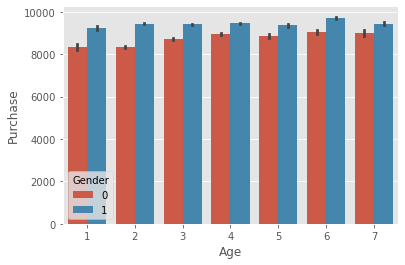

In [221]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

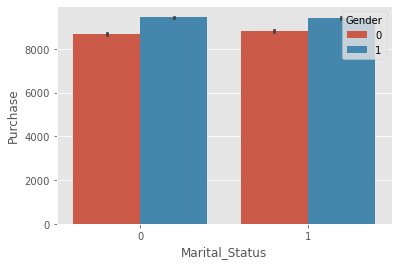

In [222]:
sns.barplot(x='Marital_Status',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

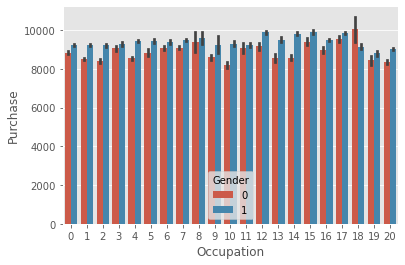

In [223]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

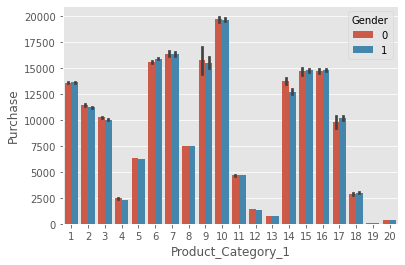

In [224]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

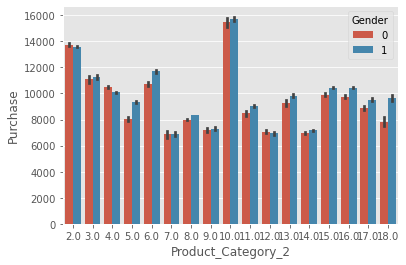

In [225]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

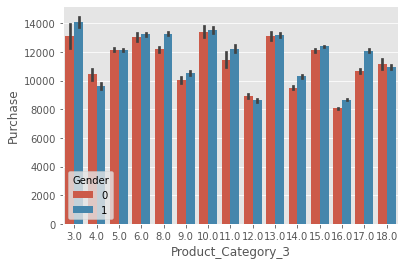

In [226]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

###### Observations:
- Male Purchase more then Female across age and Marital Status
- Across occupation male purchase more then female apart from Occupation 18.
- Product_Category1 : 10 is most purchased by both male and female.
- Product_Category2 : 10 is most purchased by both male and female.
- Product_Category3 : 10 is most purchased by female and 3 by males

In [227]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [228]:
df_test = df[df['Purchase'].isnull()]

In [229]:
df_train = df[~df['Purchase'].isnull()]

In [230]:
print(df_train.shape)

(550068, 11)


In [231]:
print(df_test.shape)

(233599, 11)


In [232]:
#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [233]:
X = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [235]:
X_train.shape

(385047, 10)

In [236]:
y_train.shape

(385047,)

In [237]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###### Build a model to predict purchase

In [238]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [239]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9261.58498313193
                            Coefficient
Gender                       219.744514
Age                          159.517602
Occupation                    40.653134
Stay_In_Current_City_Years    11.802620
Marital_Status               -27.897631
Product_Category_1         -1595.539581
Product_Category_2            -4.923591
Product_Category_3          -421.591958
B                             76.498978
C                            309.812783


In [240]:
predictions = lm.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [11817.60519671 10475.00229254  7366.15201815 ... 11292.3914949
 10465.94638941  9092.37459695]


In [241]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', metrics.mean_squared_error(y_test, predictions, squared=False))

MAE: 3577.4327862411255
MSE: 21944298.789887913


In [245]:
# Build ElasticNet Regression model
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
y_pred = en.predict(X_test)

# ElasticNet Regression
print("ElasticNet Regression")
# Root Mean Squared Error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred, squared=False))

ElasticNet Regression
MAE: 3677.850915752098
MSE: 22223588.251403607
RMSE: 4714.1900949583705


In [246]:
# Build our ANN model
import tensorflow as tf
ann = tf.keras.models.Sequential()

# Adding 2 hidden layers
ann.add(tf.keras.layers.Dense(units = 3, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 3, activation = 'relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

# Compiling our ann
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

# Train our ANN model
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

y_pred = ann.predict(X_test)

print()
# ANN Regression
print("ANN Regression")
# Root Mean Squared Error
print("Root Mean Squared Error: {:.2f}%".format(metrics.mean_squared_error(y_test, y_pred, squared=False)))
ann_rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

Epoch 1/100
12033/12033 [==============================] - 19s 1ms/step - loss: 111002184.0000 - mse: 111002184.0000
Epoch 2/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111001712.0000 - mse: 111001712.0000
Epoch 3/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111001592.0000 - mse: 111001592.0000
Epoch 4/100
12033/12033 [==============================] - 18s 1ms/step - loss: 111001984.0000 - mse: 111001984.0000
Epoch 5/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111002336.0000 - mse: 111002336.0000
Epoch 6/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111002112.0000 - mse: 111002112.0000
Epoch 7/100
12033/12033 [==============================] - 18s 1ms/step - loss: 111002128.0000 - mse: 111002128.0000
Epoch 8/100
12033/12033 [==============================] - 18s 1ms/step - loss: 111001600.0000 - mse: 111001600.0000
Epoch 9/100
12033/12033 [==============================] - 17s 1

12033/12033 [==============================] - 17s 1ms/step - loss: 111001752.0000 - mse: 111001752.0000
Epoch 71/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111001872.0000 - mse: 111001872.0000
Epoch 72/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111001960.0000 - mse: 111001960.0000
Epoch 73/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111002016.0000 - mse: 111002016.0000
Epoch 74/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111001672.0000 - mse: 111001672.0000
Epoch 75/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111002248.0000 - mse: 111002248.0000
Epoch 76/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111001712.0000 - mse: 111001712.0000
Epoch 77/100
12033/12033 [==============================] - 17s 1ms/step - loss: 111001944.0000 - mse: 111001944.0000
Epoch 78/100
12033/12033 [==============================] - 17s 1ms/s